In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', encoding = "ISO-8859-1")

In [3]:
df = df[:-3]
df[-4:]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
344,Woodridge Village,829,7,0.0,NaN,0,0,7,17,8,9,0,0.0
345,Woodstock Town,"5,931",2,0.0,NaN,0,0,2,58,13,45,0,NaN
346,Yonkers,"199,134","1,036",6.0,NaN,25,390,615,"2,368",470,"1,662",236,10.0
347,Yorktown Town,"36,643",15,0.0,NaN,0,2,13,334,45,287,2,NaN


In [4]:
df_clean = pd.DataFrame()
df_clean = df.fillna(0)
df_clean['MurderFull'] = df_clean['Murder and\nnonnegligent\nmanslaughter']
df_clean['Rape1'] = df_clean['Rape\n(revised\ndefinition)1']
df_clean['Rape2'] = df_clean['Rape\n(legacy\ndefinition)2'].str.replace(',','').astype(float)
df_clean['Population'] = df_clean['Population'].str.replace(',','').astype(float)
df_clean['ViolentCrime'] = df_clean['Violent\ncrime'].str.replace(',','').astype(float)
df_clean['RobberyFull'] = df_clean['Robbery'].str.replace(',','').astype(float)
df_clean['AggAssault'] = df_clean['Aggravated\nassault'].str.replace(',','').astype(float)
df_clean['PropertyCrime'] = df_clean['Property\ncrime'].str.replace(',','').astype(float)
df_clean['Burglary'] = df_clean['Burglary'].str.replace(',','').astype(float)
df_clean['LarcenyTheft'] = df_clean['Larceny-\ntheft'].str.replace(',','').astype(float)
df_clean['MotorVehicleTheft'] = df_clean['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)
df_clean = df_clean.drop(['Murder and\nnonnegligent\nmanslaughter','Rape\n(legacy\ndefinition)2','Rape\n(revised\ndefinition)1','Violent\ncrime','Aggravated\nassault','Property\ncrime','Larceny-\ntheft','Motor\nvehicle\ntheft' ], axis=1)

In [5]:
featsAll = pd.DataFrame()
featsAll = df_clean
featsAll['PropertyCrime'] = df['Property\ncrime'].str.replace(',','').astype(float)
featsAll['Population'] = df['Population'].fillna(0)
featsAll['Population'] = featsAll['Population'].str.replace(',','').astype(float)
featsAll['PopSq'] = np.square(featsAll['Population'])
featsAll['MurderFull'] = df['Murder and\nnonnegligent\nmanslaughter'].astype(float)
featsAll['Murder'] = [m if m == 0 else m/m for m in df['Murder and\nnonnegligent\nmanslaughter']  ]
featsAll['RobberyFull'] = df['Robbery'].fillna(0)
featsAll['RobberyFull'] = featsAll['RobberyFull'].str.replace(',','').astype(float)
featsAll['Robbery'] = [r if r == 0 else r/r for r in featsAll['RobberyFull']]

In [6]:
featsAll.head()

,City,Population,Robbery,Burglary,Arson3,MurderFull,Rape1,Rape2,ViolentCrime,RobberyFull,AggAssault,PropertyCrime,LarcenyTheft,MotorVehicleTheft,PopSq,Murder
0,Adams Village,1861.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,3.463321e+06,0.0
1,Addison Town and Village,2577.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,24.0,20.0,1.0,6.640929e+06,0.0
2,Akron Village,2846.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,16.0,15.0,0.0,8.099716e+06,0.0
3,Albany,97956.0,1.0,705.0,0.0,8.0,0.0,30.0,791.0,227.0,526.0,4090.0,3243.0,142.0,9.595378e+09,1.0
4,Albion Village,6388.0,1.0,53.0,0.0,0.0,0.0,3.0,23.0,4.0,16.0,223.0,165.0,5.0,4.080654e+07,0.0


In [7]:
featsAll.describe()

,Population,Robbery,Burglary,Arson3,MurderFull,Rape1,Rape2,ViolentCrime,RobberyFull,AggAssault,PropertyCrime,LarcenyTheft,MotorVehicleTheft,PopSq,Murder
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02,348.000000
mean,4.003763e+04,0.600575,119.683908,1.005747,1.566092,0.0,5.864943,201.594828,72.902299,121.261494,792.606322,637.017241,35.905172,2.035547e+11,0.140805
std,4.500374e+05,0.490486,924.948789,7.884612,18.303673,0.0,60.425452,2815.268504,1031.032873,1706.131730,7659.724746,6346.054451,403.423826,3.778876e+12,0.348321
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05,0.000000
25%,3.003000e+03,0.000000,6.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,1.000000,40.500000,31.000000,0.000000,9.018117e+06,0.000000
50%,7.233500e+03,1.000000,17.500000,0.000000,0.000000,0.0,0.000000,6.000000,1.000000,4.000000,112.500000,94.000000,2.000000,5.232568e+07,0.000000
75%,1.842750e+04,1.000000,51.250000,0.000000,0.000000,0.0,2.000000,22.000000,5.000000,14.000000,341.000000,287.250000,7.000000,3.397536e+08,0.000000
max,8.396126e+06,1.000000,16606.000000,132.000000,335.000000,0.0,1112.000000,52384.000000,19170.000000,31767.000000,141971.000000,117931.000000,7434.000000,7.049493e+13,1.000000


In [8]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import RFE


class Model:
    def __init__(self,name,xNames,yName,trainData,desc=''):
        from sklearn.model_selection import cross_val_score
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.desc = desc
        
        # sklearn
        self.regr = linear_model.LinearRegression()
        self.regr.fit(self.X,self.Y)
        self.rSquared = self.regr.score(self.X,self.Y)
        self.crossVal = cross_val_score(self.regr, self.X, self.Y, cv=10)
        
        #statsmodel
        self.lm = sm.OLS(self.Y, self.X).fit()
        self.params = self.lm.params
        self.pvalues = self.lm.pvalues
    
    def setDescription(self, desc):
        self.desc = desc
        
    def rSqCrossVal(self):
        msg = ">>>%s<<<\nr-squared: %f" % (self.name, self.rSquared)
        print (msg)
        print ("Cross Validation Scores: ")
        print (self.crossVal)
        
    def perf(self, boxPlot=True):
        print ("Model: " + self.name)
        print ("Description: " + self.desc)
        print ("r-squared:" + str(self.rSquared))
        print ("Cross Validation Scores: ")
        print (self.crossVal)
        if boxPlot:
            fig = plt.figure()
            title = "Performance: %s" % (self.name)
            fig.suptitle(title)
            ax = fig.add_subplot(111)
            plt.boxplot(self.crossVal)
            ax.set_xticklabels(self.name)
            plt.show()
    
    def featureRanking(self):
        featSelector = RFE(self.regr)
        featSelector = featSelector.fit(self.X, self.Y)
        rankings = pd.DataFrame({'Features': self.X.columns, 'Ranking' : featSelector.ranking_})
        print (rankings.sort_values('Ranking'))
    
    def compareFolds(self, modelRight):
        fmt = '{:<2}{:<20}|{:<10}'
        a_left = self.crossVal
        a_right = modelRight.crossVal
        a_left.sort()
        a_right.sort()
        
        print("CROSS VALIDATION SCORES")
        print(fmt.format('',self.name,modelRight.name))
        for i, (left, right) in enumerate(zip(a_left, a_right)):
            print(fmt.format(i, left, right))
            
    def compareR(self,modelRight):
        fmt = '{:<2}{:<20}|{:<20}'
        
        print("R-SQUARED")
        print(fmt.format('',self.name,modelRight.name))
        print(fmt.format('',self.rSquared,modelRight.rSquared))
        
    def compareBox(self,modelList):
        results = []
        names = []
        
        results.append(self.crossVal)
        names.append(self.name)
        
        for rightModel in modelList:
                results.append(rightModel.crossVal)
                names.append(rightModel.name)
        
        fig = plt.figure()
        title = "Performance: %s" % (self.name)
        fig.suptitle(title)
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()
        
    def fullCompare(self,modelRight):
        self.compareR(modelRight)
        print('\n')
        self.compareFolds(modelRight)
        modelList = []
        modelList.append(modelRight)
        self.compareBox(modelList)

#    def testModel(self, name, df_test):
#        self.testModel = TestModel(name,self,df_test)

class TestModel(Model):
    def __init__(self,name,trainModel,ds_test):
        self.name = name
        self.X = ds_test[trainModel.X.columns]
        self.Y = ds_test[trainModel.Y.name]
        self.regr = trainModel.regr
        
        #sklearn
        self.rSquared = trainModel.regr.score(self.X, self.Y)
        
        self.rSquared = trainModel.regr.score(self.X,self.Y)
        self.crossVal = cross_val_score(trainModel.regr, self.X, self.Y, cv=10)
        
        #statsmodel
        #self.lm = trainModel.lm(self.Y, self.X)
        #self.params = self.lm.params
        #self.pvalues = self.lm.pvalues

        

/Users/christophersmyth/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
xList_Init = []
xList_Init = ['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']
yVal = 'PropertyCrime'
m_Init = Model('Initial',xList_Init,yVal,featsAll)
m_Init.setDescription("Initial features and data")

Model: Initial
Description: Initial features and data
r-squared:0.998780265433
Cross Validation Scores: 
[  8.69231462e-01   9.80535182e-01   5.16399936e-01   7.95729569e-01
   1.53463760e-01   7.51434764e-01  -1.23126444e+03   9.64058394e-01
   9.58421927e-01   2.03436515e-01]


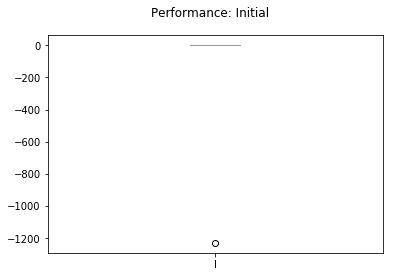

In [10]:
m_Init.perf()

Model: Rmv Pop Outliers
Description: 
r-squared:0.670667705909
Cross Validation Scores: 
[ 0.80837823  0.72950863  0.77914599  0.65477594  0.68432515  0.45974326
  0.42898864  0.83170547  0.50391171  0.37990844]


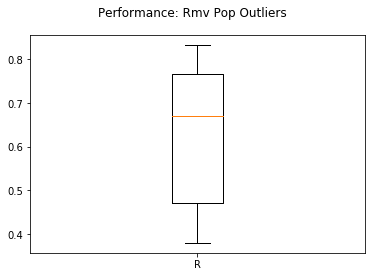

In [11]:
f_NoPopOL = featsAll[featsAll['Population'] < featsAll['Population'].quantile(0.8)]
m_NoPopOL = Model('Rmv Pop Outliers',xList_Init,yVal,f_NoPopOL)
m_NoPopOL.perf()

R-SQUARED
  Rmv Pop Outliers    |Initial             
  0.6706677059094278  |0.9987802654331784  


CROSS VALIDATION SCORES
  Rmv Pop Outliers    |Initial   
0 0.3799084387734818  |-1231.2644377749396
1 0.4289886384245616  |0.15346376006402662
2 0.4597432574867609  |0.2034365152544102
3 0.5039117056344213  |0.5163999359856598
4 0.6547759384833411  |0.7514347639372401
5 0.6843251454173225  |0.7957295690622814
6 0.7295086255464073  |0.8692314622027926
7 0.7791459872625075  |0.9584219274327229
8 0.808378231049701   |0.9640583941735129
9 0.8317054664872829  |0.9805351821022643


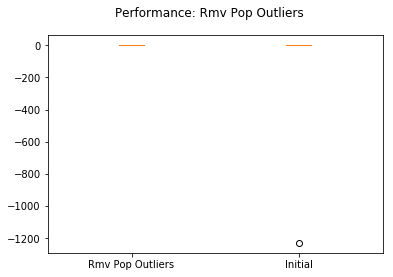

In [12]:
m_NoPopOL.fullCompare(m_Init)

In [13]:
m_NoPopOL.pvalues

Population     1.420394e-05
PopSq          5.401920e-01
Murder         6.751325e-01
Robbery        2.411738e-03
RobberyFull    2.090317e-18
MurderFull     6.751325e-01
dtype: float64

In [14]:
xList_RmvLowPs = []
xList_RmvLowPs = ['Population','Robbery','RobberyFull','MurderFull']
yVal = 'PropertyCrime'
m_RmvLowPs = Model('Remove Low Pvals',xList_RmvLowPs,yVal,f_NoPopOL)

R-SQUARED
  Remove Low Pvals    |Rmv Pop Outliers    
  0.670186338483763   |0.6706677059094278  


CROSS VALIDATION SCORES
  Remove Low Pvals    |Rmv Pop Outliers
0 0.38384736438317113 |0.3799084387734818
1 0.4319696316754865  |0.4289886384245616
2 0.46902233909581054 |0.4597432574867609
3 0.49666392218421784 |0.5039117056344213
4 0.653948860923813   |0.6547759384833411
5 0.6961885924179562  |0.6843251454173225
6 0.7260213877596111  |0.7295086255464073
7 0.7810587439331347  |0.7791459872625075
8 0.8090842199516748  |0.808378231049701
9 0.8286985138371599  |0.8317054664872829


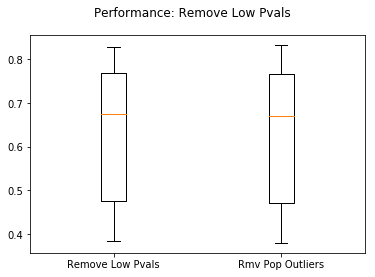

In [15]:
m_RmvLowPs.fullCompare(m_NoPopOL)

In [16]:
m_RmvLowPs.featureRanking()

      Features  Ranking
1      Robbery        1
2  RobberyFull        1
3   MurderFull        2
0   Population        3


In [17]:
yVal = 'PropertyCrime'
xList_All = featsAll.drop(['City',yVal], axis=1).columns
m_All = Model('All',xList_All,yVal,f_NoPopOL)

In [18]:
m_All.featureRanking()

             Features  Ranking
1             Robbery        1
2            Burglary        1
4          MurderFull        1
7        ViolentCrime        1
10       LarcenyTheft        1
11  MotorVehicleTheft        1
13             Murder        1
9          AggAssault        2
3              Arson3        3
6               Rape2        4
8         RobberyFull        5
0          Population        6
12              PopSq        7
5               Rape1        8


In [19]:
yVal = 'PropertyCrime'
xList_TopRanked = ['Population','Robbery','Burglary','MurderFull','ViolentCrime','LarcenyTheft','MotorVehicleTheft','Murder']
m_TopR = Model('Top Ranked',xList_TopRanked,yVal,f_NoPopOL)

R-SQUARED
  Top Ranked          |Remove Low Pvals    
  1.0                 |0.670186338483763   


CROSS VALIDATION SCORES
  Top Ranked          |Remove Low Pvals
0 1.0                 |0.38384736438317113
1 1.0                 |0.4319696316754865
2 1.0                 |0.46902233909581054
3 1.0                 |0.49666392218421784
4 1.0                 |0.653948860923813
5 1.0                 |0.6961885924179562
6 1.0                 |0.7260213877596111
7 1.0                 |0.7810587439331347
8 1.0                 |0.8090842199516748
9 1.0                 |0.8286985138371599


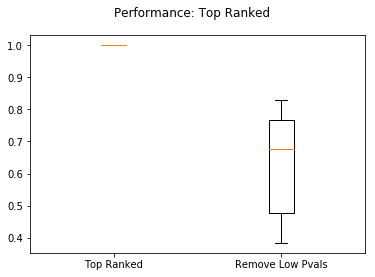

In [20]:
m_TopR.fullCompare(m_RmvLowPs)

In [21]:
df2 = pd.read_csv('table_8_offenses_known_to_law_enforcement_texas_by_city_2013.csv', encoding = "ISO-8859-1")
df2 = df2[:-3]

In [22]:
df2_clean = pd.DataFrame()
df2_clean = df2.fillna(0)
df2_clean['MurderFull'] = df2_clean['Murder and\nnonnegligent\nmanslaughter']
df2_clean['Murder'] = [m if m == 0 else m/m for m in df2_clean['MurderFull']]
df2_clean['Rape1'] = df2_clean['Rape\n(revised\ndefinition)1']
df2_clean['Rape2'] = df2_clean['Rape\n(legacy\ndefinition)2']
df2_clean['Population'] = df2_clean['Population'].str.replace(',','').astype(float)
df2_clean['PopSq'] = np.square(df2_clean['Population'])
df2_clean['ViolentCrime'] = df2_clean['Violent\ncrime'].str.replace(',','').astype(float)
df2_clean['RobberyFull'] = df2_clean['Robbery'].str.replace(',','').astype(float)
df2_clean['AggAssault'] = df2_clean['Aggravated\nassault'].str.replace(',','').astype(float)
df2_clean['PropertyCrime'] = df2_clean['Property\ncrime'].str.replace(',','').astype(float)
df2_clean['Burglary'] = df2_clean['Burglary'].str.replace(',','').astype(float)
df2_clean['LarcenyTheft'] = df2_clean['Larceny-\ntheft'].str.replace(',','').astype(float)
df2_clean['MotorVehicleTheft'] = df2_clean['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)
df2_clean['RobberyFull'] = df2_clean['Robbery'].fillna(0)
df2_clean['RobberyFull'] = df2_clean['RobberyFull'].str.replace(',','').astype(float)
df2_clean['Robbery'] = [r if r == 0 else r/r for r in df2_clean['RobberyFull']]
df2_clean = df2_clean.drop(['Murder and\nnonnegligent\nmanslaughter','Rape\n(legacy\ndefinition)2','Rape\n(revised\ndefinition)1','Violent\ncrime','Aggravated\nassault','Property\ncrime','Larceny-\ntheft','Motor\nvehicle\ntheft' ], axis=1)

In [23]:
featsAllTx13 = pd.DataFrame()
featsAllTx13 = df2_clean

In [24]:
testM_Texas2013 = TestModel('Texas 2013',m_NoPopOL,featsAllTx13)

In [25]:
testM_Texas2013.crossVal

array([ 0.97124782,  0.90446826,  0.89054979,  0.97573105,  0.87031917,
        0.75345177,  0.73410421,  0.94249485,  0.48918414,  0.85287921])

R-SQUARED
  Texas 2013          |Rmv Pop Outliers    
  -18.93678937586965  |0.6706677059094278  


CROSS VALIDATION SCORES
  Texas 2013          |Rmv Pop Outliers
0 0.4891841437998655  |0.3799084387734818
1 0.7341042103883315  |0.4289886384245616
2 0.7534517700601936  |0.4597432574867609
3 0.8528792113235739  |0.5039117056344213
4 0.8703191698843666  |0.6547759384833411
5 0.8905497873272703  |0.6843251454173225
6 0.9044682593928124  |0.7295086255464073
7 0.9424948482341972  |0.7791459872625075
8 0.9712478204003998  |0.808378231049701
9 0.9757310481451841  |0.8317054664872829


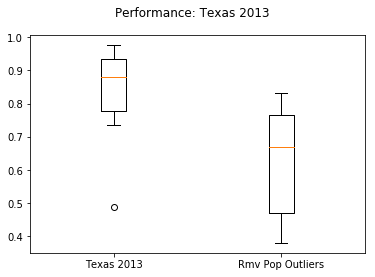

In [26]:
testM_Texas2013.fullCompare(m_NoPopOL)

In [27]:
testM_Texas2013.featureRanking()

      Features  Ranking
2       Murder        1
3      Robbery        1
5   MurderFull        1
4  RobberyFull        2
0   Population        3
1        PopSq        4


In [28]:
m_All.featureRanking()

             Features  Ranking
1             Robbery        1
2            Burglary        1
4          MurderFull        1
7        ViolentCrime        1
10       LarcenyTheft        1
11  MotorVehicleTheft        1
13             Murder        1
9          AggAssault        2
3              Arson3        3
6               Rape2        4
8         RobberyFull        5
0          Population        6
12              PopSq        7
5               Rape1        8


In [29]:
yVal = 'PropertyCrime'
xList_TopRanked = ['Population','Robbery','Burglary','MurderFull','ViolentCrime','LarcenyTheft','MotorVehicleTheft','Murder']
m_TopR = Model('Top Ranked',xList_TopRanked,yVal,featsAllTx13)

In [30]:
yVal = 'PropertyCrime'
txFeats = ['RobberyFull', 'MurderFull', 'Population']
m_tx = Model('Texas Friendly',txFeats,yVal,f_NoPopOL)

In [31]:
testM_Texas2013_2 = TestModel('Texas 2013',m_tx,featsAllTx13)

R-SQUARED
  Texas 2013          |Texas Friendly      
  -0.004747681310465435|0.6595162549793729  


CROSS VALIDATION SCORES
  Texas 2013          |Texas Friendly
0 0.3627628507517764  |0.3704887229145125
1 0.45570258738451863 |0.4121808068035515
2 0.6632032395556483  |0.41711072214278466
3 0.7386303302814098  |0.42842757740191895
4 0.8983304699051773  |0.6415760666793198
5 0.9076262598031378  |0.7090563071812008
6 0.9133355552942287  |0.7160276501846476
7 0.9359558861705098  |0.7672924566193235
8 0.9580332612454068  |0.8323813842850537
9 0.9812232126381787  |0.8407139851495984


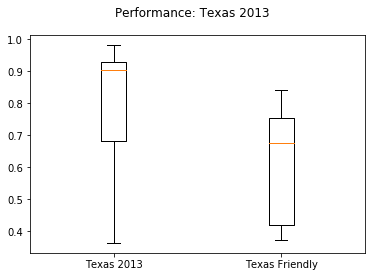

In [32]:
testM_Texas2013_2.fullCompare(m_tx)

In [33]:
df3 = pd.read_csv('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv', encoding = "ISO-8859-1")
df3 = df3[:-7]

In [34]:
df3_clean = pd.DataFrame()
df3_clean = df3.fillna(0)
df3_clean['MurderFull'] = df3_clean['Murder and\nnonnegligent\nmanslaughter']
df3_clean['Murder'] = [m if m == 0 else m/m for m in df3_clean['MurderFull']]
df3_clean['Rape1'] = df3_clean['Rape\n(revised\ndefinition)1'].str.replace(',','').astype(float).fillna(0)
df3_clean['Rape2'] = df3_clean['Rape\n(legacy\ndefinition)2']
df3_clean['Population'] = df3_clean['Population'].str.replace(',','').astype(float)
df3_clean['PopSq'] = np.square(df3_clean['Population'])
df3_clean['ViolentCrime'] = df3_clean['Violent\ncrime'].str.replace(',','').astype(float)
df3_clean['RobberyFull'] = df3_clean['Robbery'].str.replace(',','').astype(float)
df3_clean['AggAssault'] = df3_clean['Aggravated\nassault'].str.replace(',','').astype(float)
df3_clean['PropertyCrime'] = df3_clean['Property\ncrime'].str.replace(',','').astype(float).fillna(0)
df3_clean['Burglary'] = df3_clean['Burglary'].str.replace(',','').astype(float)
df3_clean['LarcenyTheft'] = df3_clean['Larceny-\ntheft'].str.replace(',','').astype(float).fillna(0)
df3_clean['MotorVehicleTheft'] = df3_clean['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)
df3_clean['RobberyFull'] = df3_clean['Robbery'].fillna(0)
df3_clean['RobberyFull'] = df3_clean['RobberyFull'].str.replace(',','').astype(float)
df3_clean['Robbery'] = [r if r == 0 else r/r for r in df3_clean['RobberyFull']]
df3_clean = df3_clean.drop(['Murder and\nnonnegligent\nmanslaughter','Rape\n(legacy\ndefinition)2','Rape\n(revised\ndefinition)1','Violent\ncrime','Aggravated\nassault','Property\ncrime','Larceny-\ntheft','Motor\nvehicle\ntheft' ], axis=1)

In [35]:
featsAllTx13 = pd.DataFrame()
featsAllNy14 = df3_clean

In [37]:
testM_NY2013 = TestModel('NY 2014',m_NoPopOL,featsAllNy14)

R-SQUARED
  NY 2014             |Texas 2013          
  -3623.1982056573343 |-0.004747681310465435


CROSS VALIDATION SCORES
  NY 2014             |Texas 2013
0 -471.44103410776876 |0.3627628507517764
1 -0.2822032791485931 |0.45570258738451863
2 0.17310467893715864 |0.6632032395556483
3 0.533919210692487   |0.7386303302814098
4 0.611927766216854   |0.8983304699051773
5 0.6685382689450557  |0.9076262598031378
6 0.8666720606268679  |0.9133355552942287
7 0.9140971988799125  |0.9359558861705098
8 0.9385685766017288  |0.9580332612454068
9 0.9718263960476061  |0.9812232126381787


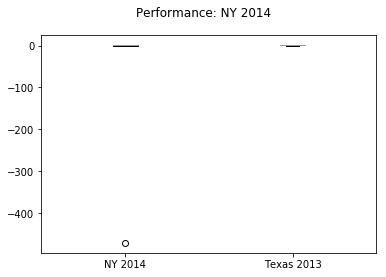

In [38]:
testM_NY2013.fullCompare(testM_Texas2013_2)

In [ ]:
from sklearn.feature_selection import RFE

#target = snt_train['score']
#data = feats_pn_plus_n
#y_pred,bnb = BnbClassifier (data, target)

featSelector = RFE(m_RmvLowPs.regr)
featSelector = featSelector.fit(m_RmvLowPs.X, m_RmvLowPs.Y)

In [ ]:
rankings = pd.DataFrame({'Features': m_RmvLowPs.X.columns, 'Ranking' : featSelector.ranking_})
rankings.sort_values('Ranking')

In [ ]:
f_init = featsAll[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]
Y=featsAll['PropertyCrime']
m_Initial = Model('Initial',f_init, Y)

In [ ]:
m_Initial.perf()

In [ ]:
# remove outliers
f_NoPopOL = featsAll[featsAll['Population'] < featsAll['Population'].quantile(0.80)]
Y_NoPopOL = f_NoPopOL['PropertyCrime']
f_NoPopOL = f_NoPopOL[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]


m_NoPopOL = Model('No Pop Outliers',f_NoPopOL, Y_NoPopOL)



In [ ]:
def CompareRandCross(featSetList, Y, regr, fit=True):
    from sklearn import linear_model
    from sklearn.model_selection import cross_val_score

    Y=Y.values.reshape(-1,1)
    results = []
    names = []
    for name,X in featSetList:
        if fit:
            regr.fit(X,Y)
        names.append(name)
        rSq = regr.score(X,Y)
        crsVal = cross_val_score(regr, X, Y, cv=10)
        results.append(crsVal)
        msg = ">>>%s<<<\nr-squared: %f" % (name, rSq)
        print (msg)
        print ("Cross Validation Scores: ")
        print (crsVal)
    fig = plt.figure()
    fig.suptitle('Feature Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return regr

In [ ]:
# remove outliers
#f_NoPopOL = featsAll[featsAll['Population'] < featsAll['Population'].quantile(0.80)]
#f_1 = f_NoPopOL[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]


In [ ]:
f_init = featsAll[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]
Y=featsAll['PropertyCrime']
featSetList = []
featSetList.append(('feats1',f_init))

regr = linear_model.LinearRegression()
CompareRandCross(featSetList, Y, regr)


In [ ]:
# remove outliers
f_NoPopOL = featsAll[featsAll['Population'] < featsAll['Population'].quantile(0.80)]
Y=featsAll['PropertyCrime']

featSetList = []
featSetList.append(('f_init',f_init,'f_NoPopOL'))

regr = linear_model.LinearRegression()
CompareRandCross(featSetList, Y, regr)


In [ ]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = featsAll['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = featsAll[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(regr, X, Y, cv=10)

In [ ]:
# remove outlier
#featsRmvOut1 = pd.DataFrame()
#featsRmvOut1 = feats[feats['Population'] < np.percentile(feats['Population'], 100)].copy()

In [ ]:
feats = feats[feats['Population'] < feats['Population'].quantile(0.80)]

In [ ]:

Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]


In [ ]:
cross_val_score(regr.fit(X,Y), X, Y, cv=10)

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
linear_formula = 'PropertyCrime ~ Population+PopSq+Murder+Robbery+RobberyFull+MurderFull'

In [ ]:
lm = smf.ols(formula=linear_formula, data=feats).fit()

In [ ]:
initPvals = lm.pvalues
print(initPvals)

In [ ]:
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','Murder','Robbery','RobberyFull','MurderFull']]
cross_val_score(regr.fit(X,Y), X, Y, cv=10)

In [ ]:
linear_formula = 'PropertyCrime ~ Population+Murder+Robbery+RobberyFull+MurderFull'
lm = smf.ols(formula=linear_formula, data=feats).fit()
initPvals = lm.pvalues
print(initPvals)

In [ ]:
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','RobberyFull','MurderFull']]
cross_val_score(regr.fit(X,Y), X, Y, cv=10)

In [ ]:
linear_formula = 'PropertyCrime ~ Population+RobberyFull+MurderFull'
lm = smf.ols(formula=linear_formula, data=feats).fit()
initPvals = lm.pvalues
print(initPvals)

In [ ]:
feats.head()

In [ ]:
X.head()

In [ ]:
sns.boxplot(y='Population', data=feats)
plt.show()